### Problem 3

<font size = 3 color = black face = "Times New Roman">Our problem is to find the bond length of the diatomic molecule NaCl (sodium chloride) from the interaction potential between the two ions.  The bond length $r_{\text{eq}}$ is the equilibrium distance when $V\left(  r\right)$ is at its minimum. 
    
<font size = 3 color = black face = "Times New Roman">We have the potential model $V(r)=-\dfrac{e^2}{r}+V_0e^{-r/r_0}$ and related parameters $e^2=14.4$ $\text{Å}\cdot eV$, $V_0=1.09\times 10^3 \text{ eV}$, $r_0=0.330\text{ Å}$. 

In [4]:
# Enter related parameters.
e_e = 14.4 # Å.eV
V_0 = 1.09 * 10 ** 3 # eV
r_0 = 0.330 # Å

<font size = 3 color = black face = "Times New Roman"> To get the minimum of $V(r)$, it's actual solving the equation $V'(r) = 0$. Here we choose Newton's method to solve this equation, and therefore, we requires the first and second order derivative for $V(r)$. Let $f(r) = V'(r)$, then $f'(r) = V''(r)$. Firstly, let's get $f(r)$ and $f'(r)$ by direct mathematical calculation.
$$
f(r) = V'(r) = \dfrac{e^2}{r^2}-\dfrac{V_0}{r_0}e^{-r/r_0}
$$
As a result,
$$
f(r) = V'(r) = -\dfrac{2e^2}{r^3}+ \dfrac{V_0}{{r_0}^2}e^{-r/r_0}
$$

In [2]:
# Entering the original function and its first and second order derivative.
import numpy as np
def V(r): # Original function
    return - e_e / r + V_0 * np.exp(- r / r_0)

def f(r): # First order derivative
    return e_e / r**2 - (V_0 * np.exp(- r / r_0)) / r_0

def dfdr(r): # Second order derivative
    return -2 * e_e / r**3 + (V_0 * np.exp(- r / r_0)) / (r_0 ** 2)

<font size = 3 color = black face = "Times New Roman"> Since we assume when $V(r)$ is at its minimum, $r = r_{eq}$, so $f(r_{eq}) = 0$. Then,  let's plot the plot  $f(r)$ as a function of $r$ to have a general idea where $r_{\text{eq}}$, the zero point for $f(r)$, locates.

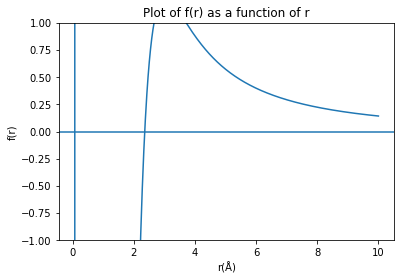

In [13]:
r = np.linspace(0.05, 10, 1000)
plt.plot(r, f(r))
plt.title('Plot of f(r) as a function of r')
plt.xlabel('r(Å)')
plt.ylabel('f(r)')
plt.ylim([-1,1]) # Limit the range of y to have a better look at the zero points.
plt.axhline(y=0)
plt.show()

<font size = 3 color = black face = "Times New Roman">There seems to exist more than zero points. Since for the first zero point $f(r)>0$ before it goes to zero, it actually indicates a maximum point. On the other hand, for the second one $f(r)<0$ before it goes to zero, so it corresponds to the minimum point. Clearly, the second one is what we actually want. As a result we limit the section chosen to $[2,4]$ and do another plotting.

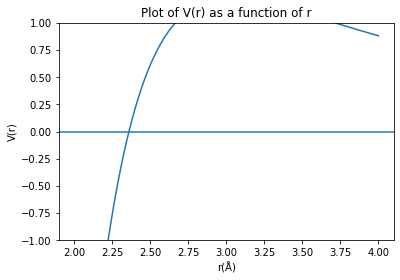

In [146]:
r = np.linspace(2, 4, 1000)
plt.plot(r, f(r))
plt.title('Plot of V(r) as a function of r')
plt.xlabel('r(Å)')
plt.ylabel('V(r)')
plt.ylim([-1,1]) # Limit the range of y to have a better look at the zero points.
plt.axhline(y=0)
plt.show()

<font size = 3 color = black face = "Times New Roman">From the plotting above we can find $r_{eq}$ is in the section $[2,2.5]$.
    
<font size = 3 color = black face = "Times New Roman"> **Here we use the stragety given in the lecture note: Newton Raphson Algorithm**

In [181]:
import sys
def minimum_finder(g, f, dfdx, x, eps): 
    g_value = g(x) 
    f_value = f(x)
    temp_g = g(x) + 1 
    iteration_counter = 0
    temp_x = x - 1 # Set an initial value for temp_x.

    while abs(x - temp_x) > eps and iteration_counter < 100:
        try:
            temp_x = x # Store the previous value for x.
            delta_x = - f_value/dfdx(x)
            if g(x + delta_x) > g(x): # Test whether the operation makes g(x) larger.
                delta_x = -delta_x # Inverse the sign for delta_X if it makes x farther from the solution.
            x = x + delta_x
        except ZeroDivisionError: # Dealing with the zerodivision error.
            print('Error! - derivative zero for x = {:g}'.format(x))
            sys.exit(1) 
        f_value = f(x)
        iteration_counter += 1
        
    if abs(x - temp_x) > eps: # Not convergent.
        iteration_counter = -1  
    return x, iteration_counter

In [196]:
eps = 10 ** (-10) # Set the tolerance epsilon. 
print(minimum_finder(V, f, dfdr, x = 0.2, eps = 10 **(-10)))  
print(minimum_finder(V, f, dfdr, x = 0.5, eps = 10 **(-10)))  
print(minimum_finder(V, f, dfdr, x = 2, eps = 10 **(-10)))
print(minimum_finder(V, f, dfdr, x = 2.5, eps = 10 **(-10))) 
print(minimum_finder(V, f, dfdr, x = 15, eps = 10 **(-10)))  

(2.3605384841577854, 11)
(2.3605384841577943, 11)
(2.3605384841577943, 7)
(2.3605384841577943, 6)
(2.3605384841577943, 11)


<font size = 3 color = black face = "Times New Roman">Now,we get the result we want: $r_{eq} \approx 2.3605384841577943Å$. However, we can find that the solution can be affected by the initial points chosen. Therefore, though this program can find the solution even though x is not very close to the point, we should still be careful when choosing the initial point, for instance, x = 0.1 may fail to get the correct answer.

<font size = 3 color = black face = "Times New Roman">Finally, let's compare the result with the results from Python package `scipy.optimize`

In [206]:
from scipy import optimize
for r in [0.5, 2, 2.3, 2.5, 15]:
    sol_scipy = optimize.minimize(V, r)
    print('{}\n'.format(sol_scipy))

      fun: -5.247489118539933
 hess_inv: array([[0.17640446]])
      jac: array([-2.32458115e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([2.36053806])

      fun: -5.24748911853978
 hess_inv: array([[0.17610372]])
      jac: array([2.74181366e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([2.36053897])

      fun: -5.247489118540433
 hess_inv: array([[0.1773858]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.36053848])

      fun: -5.247489118537127
 hess_inv: array([[0.17581081]])
      jac: array([6.19888306e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.36053957])

      fun:

<font size = 3 color = black face = "Times New Roman"> We can see the results is in line with our solutions for the first several significant numbers. But this solution can is not stable if I choose different initial guess.The initial guess closest to the final results gives rise to the result almost the same with our result, but still not so accurate. **In a word, our result is correst, and  $r_{eq} \approx 2.3605384841577943Å$.**

### Problem 4

#### a)

<font size = 3 color = black face = "Times New Roman">Since the nonlinear system is  
$$
\begin{cases}
2e^x+y=0\\
3x^2+4y^2=8
\end{cases}
$$
We do two plottings and check their crossing point to locate the root graphically. Firstly, we need to convert two equations into two functions. For the first equation:$$y_1 = -2e^x$$
From the first equation we can find that the crossing points can only occur for when $y<0$ since $y_1$ is always smaller than 0. Therefor, for the second equation, when $y<0$
$$
y_2 = -\dfrac{\sqrt{8 - 3x^2}}{2}
$$
From $y_2$ we can find x is constrained in $[-\dfrac{2\sqrt{6}}{3}, \dfrac{2\sqrt{6}}{3}]$

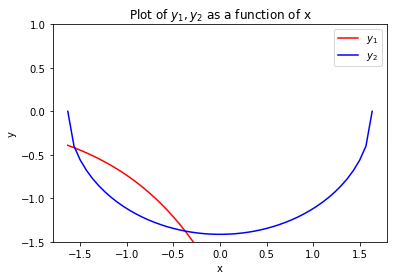

In [272]:
import numpy as np
x = np.linspace(- 2*np.sqrt(6)/3, 2*np.sqrt(6)/3)
y1 = -2*np.exp(x)
y2 = - (8-3*x**2)**(1/2)/2
plt.plot(x, y1, color = 'r')
plt.plot(x, y2, color = 'b')
plt.title(r'Plot of $y_1,y_2$ as a function of x')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1.5, 1])
plt.legend([r'$y_1$',r'$y_2$'])
plt.show()

<font size = 3 color = black face = "Times New Roman"> From the figure, we can find that the crossing points are between $[-2, -1.5]$ and $[-0.5, 0]$ respectively. 

#### b)

<font size = 3 color = black face = "Times New Roman"> To solve this set of nonlinear equations, we still use Newton's method. First, we need to determine the original matrix F and its corresponding Jacobi matrix J. Since the matrix is not so difficult, we calculate it directly.

<font size = 3 color = black face = "Times New Roman"> The original matrix
    $$F = \left( \begin{matrix} f_1 \\ f_2 \end{matrix} \right) = \left( \begin{matrix} 2e^x+y \\ 3x^2+4y^2-8 \end{matrix} \right) $$
The Jacobian matrix
     $$J = \left( \begin{matrix} \dfrac{\partial f_1}{\partial x} & \dfrac{\partial f_1}{\partial y} \\ \dfrac{\partial f_2}{\partial x} & \dfrac{\partial f_2}{\partial y} \end{matrix} \right) = \left( \begin{matrix} 2e^x & 1 \\ 6x & 8y \end{matrix} \right)$$

In [5]:
# Entering F and J
def F(x):
    return np.array(
        [2*np.exp(x[0]) + x[1],
         3*x[0]**2 + 4*x[1]**2 - 8])
def J(x):
    return np.array(
        [[2*np.exp(x[0]), 1],
        [6*x[0], 8*x[1]]])

In [25]:
import numpy as np
def Newton_system(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2) # l2 norm of vector
    iteration_counter = 0
    
    while abs(F_norm) > eps and iteration_counter < 100: # Use the norm to judge to accuracy.
        delta_x = np.linalg.solve(J(x), -F_value) #Solve delta_x from F_value + J(x)*delta_x = 0
        x = x + delta_x
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter = iteration_counter + 1
        
    if abs(F_norm) > eps: # Not convergent.
        iteration_counter = -1
    return x, iteration_counter

In [16]:
# Try multiple initial values and set the accuracy 10e-8
print(Newton_system(F, J, x=np.array([-3, -0.5]), eps=10**(-8))) 
print(Newton_system(F, J, x=np.array([-1.5, -0.5]), eps=10**(-8)))
print(Newton_system(F, J, x=np.array([-0.5, -1.2]), eps=10**(-8)))
print(Newton_system(F, J, x=np.array([-0, -1.5]), eps=10**(-8)))

(array([-1.55907909, -0.42065935]), 5)
(array([-1.55907909, -0.42065935]), 3)
(array([-0.37342874, -1.37674007]), 4)
(array([-0.37342874, -1.37674007]), 4)


<font size = 3 color = black face = "Times New Roman"> Finally, we get the two sets of solutions:
$$
\begin{cases}
x_1 = -1.55907909\\
y_1 =-0.42065935
\end{cases}
\begin{cases}
x_2 = -0.37342874\\
y_2 =-1.376740075
\end{cases}
$$

<font size = 3 color = black face = "Times New Roman">Finally, let's compare the result with the results from Python package `scipy.optimize`

In [24]:
from scipy.optimize import fsolve
import numpy as np
import math
print(fsolve(F, [-1.5, -0.5] ))
print(fsolve(F, [-0.5, -1.2] ))

[-1.55907909 -0.42065935]
[-0.37342874 -1.37674007]


<font size = 3 color = black face = "Times New Roman">We can find that these results are in line with our results. It proves that our results are accurate.